# https://data.police.uk/docs/
 Police API Documentation

In [1]:
# PySpark API:
#http://spark.apache.org/docs/latest/api/python/index.html

import os
import sys

os.environ["SPARK_HOME"] = "/usr/spark2.4.3"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
os.environ["PYSPARK_PYTHON"] = "/usr/local/anaconda/bin/python" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/local/anaconda/bin/python"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")
 
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext

from pyspark.sql import SparkSession
from functools import reduce
from pyspark.sql.functions import col, lit, when

In [2]:
# The Spark Definition

import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
sqlContext = SQLContext(spark)

In [3]:
# Import libraries and other functions

from io import StringIO
from collections import namedtuple
from pyspark.sql import Row
from pyspark.sql.types import *
from pyspark.sql.functions import *

import csv
import matplotlib.pyplot as plt
import gmplot
import pandas as pd

In [4]:
#Create a Dataframe directly from 'BritishTransportPolice' Folder

britTransPolice = spark.read.option("header","true").option("delimiter",",").option("inferSchema","true")\
.csv("hdfs:///user/imat5322_46432/BritishTransportPolice")

In [5]:
#Display first three rows of Dataframe 'britTransPolice' to make sure the dataset is loading properly

britTransPolice.head(3)

[Row(Crime ID=None, Month='2020-01', Reported by='British Transport Police', Falls within='British Transport Police', Longitude=-0.271604, Latitude=50.8344, Location='On or near Shoreham-By-Sea (Station)', LSOA code='E01031365', LSOA name='Adur 002D', Crime type='Bicycle theft', Last outcome category=None, Context=None),
 Row(Crime ID=None, Month='2020-01', Reported by='British Transport Police', Falls within='British Transport Police', Longitude=-0.271604, Latitude=50.8344, Location='On or near Shoreham-By-Sea (Station)', LSOA code='E01031365', LSOA name='Adur 002D', Crime type='Bicycle theft', Last outcome category=None, Context=None),
 Row(Crime ID=None, Month='2020-01', Reported by='British Transport Police', Falls within='British Transport Police', Longitude=-0.237124, Latitude=50.8325, Location='On or near Southwick (Station)', LSOA code='E01031375', LSOA name='Adur 004G', Crime type='Violence and sexual offences', Last outcome category=None, Context=None)]

In [6]:
# Retrieve only the Column names

britTransPolice.columns

['Crime ID',
 'Month',
 'Reported by',
 'Falls within',
 'Longitude',
 'Latitude',
 'Location',
 'LSOA code',
 'LSOA name',
 'Crime type',
 'Last outcome category',
 'Context']

In [7]:
#Get the description of the data in the DataFrame

britTransPolice.describe()

DataFrame[summary: string, Crime ID: string, Month: string, Reported by: string, Falls within: string, Longitude: string, Latitude: string, Location: string, LSOA code: string, LSOA name: string, Crime type: string, Last outcome category: string, Context: string]

In [8]:
# List the features of Columns

dir(britTransPolice.columns)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [9]:
# Replacing Empty spaces in Column names with underscore

britTransPolice = britTransPolice.withColumnRenamed('Crime ID', 'Crime_ID')
britTransPolice = britTransPolice.withColumnRenamed('Reported by', 'Reported_by')
britTransPolice = britTransPolice.withColumnRenamed('Falls within', 'Falls_within')
britTransPolice = britTransPolice.withColumnRenamed('LSOA code', 'LSOA_code')
britTransPolice = britTransPolice.withColumnRenamed('LSOA name', 'LSOA_name')
britTransPolice = britTransPolice.withColumnRenamed('Crime type', 'Crime_type')
britTransPolice = britTransPolice.withColumnRenamed('Last outcome category', 'Last_outcome_category')

In [10]:
#Display the schema of the dataframe'britTransPolice'

britTransPolice.printSchema()

root
 |-- Crime_ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported_by: string (nullable = true)
 |-- Falls_within: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA_code: string (nullable = true)
 |-- LSOA_name: string (nullable = true)
 |-- Crime_type: string (nullable = true)
 |-- Last_outcome_category: string (nullable = true)
 |-- Context: string (nullable = true)



In [11]:
c = 0 # Reset counter
#Get the Total Number of Records
total = britTransPolice.count()
print("******************************************")
print("Total Records in britTransPolice = " + str(total))

#Print the total Number of Columns
print("Total Columns in britTransPolice = " + str(len(britTransPolice.columns)))
print("******************************************")

#Get the Missing Value number and Missing Rate of each column by looping entire table
while c < len(britTransPolice.columns): #Loop through all columns
    print(str(c+1) + "." + str(britTransPolice[c]))
    print("  Missing Values = ") 
    print("************************************************")
    mv = britTransPolice.select([count(when(britTransPolice[c].isNull(),\
                                        True))]).show() #Check for Missing values
    c = c+1 #Add 1 to counter variable

******************************************
Total Records in britTransPolice = 84543
Total Columns in britTransPolice = 12
******************************************
1.Column<b'Crime_ID'>
  Missing Values = 
************************************************
+-------------------------------------------------+
|count(CASE WHEN (Crime_ID IS NULL) THEN true END)|
+-------------------------------------------------+
|                                            84543|
+-------------------------------------------------+

2.Column<b'Month'>
  Missing Values = 
************************************************
+----------------------------------------------+
|count(CASE WHEN (Month IS NULL) THEN true END)|
+----------------------------------------------+
|                                             0|
+----------------------------------------------+

3.Column<b'Reported_by'>
  Missing Values = 
************************************************
+----------------------------------------------------+


In [12]:
#Reset counter
c=0

print("******************************************")

#loop each column and get the Description of each one
while c < len(britTransPolice.columns):
    mv =  britTransPolice.where(britTransPolice[c] =='').count() #get the Missing Value Number of current column
    print(str(c+1) + "." + str(britTransPolice[c]))
    britTransPolice.where(britTransPolice[c] !='').describe(britTransPolice.columns[c]).show()
    print("******************************************")
    c = c+1 #Counter adds 1

******************************************
1.Column<b'Crime_ID'>
+-------+--------+
|summary|Crime_ID|
+-------+--------+
|  count|       0|
|   mean|    null|
| stddev|    null|
|    min|    null|
|    max|    null|
+-------+--------+

******************************************
2.Column<b'Month'>
+-------+-------+
|summary|  Month|
+-------+-------+
|  count|  84543|
|   mean|   null|
| stddev|   null|
|    min|2020-01|
|    max|2022-01|
+-------+-------+

******************************************
3.Column<b'Reported_by'>
+-------+--------------------+
|summary|         Reported_by|
+-------+--------------------+
|  count|               84543|
|   mean|                null|
| stddev|                null|
|    min|British Transport...|
|    max|British Transport...|
+-------+--------------------+

******************************************
4.Column<b'Falls_within'>
+-------+--------------------+
|summary|        Falls_within|
+-------+--------------------+
|  count|               8454

In [13]:
# Removing unwanted Columns

britTransPolice = britTransPolice.drop('Crime_ID','Reported_by','LSOA_code','LSOA_name','Last_outcome_category','Context')
britTransPolice.show(5) #Displaying top 5 rows

+-------+--------------------+---------+--------+--------------------+--------------------+
|  Month|        Falls_within|Longitude|Latitude|            Location|          Crime_type|
+-------+--------------------+---------+--------+--------------------+--------------------+
|2020-01|British Transport...|-0.271604| 50.8344|On or near Shoreh...|       Bicycle theft|
|2020-01|British Transport...|-0.271604| 50.8344|On or near Shoreh...|       Bicycle theft|
|2020-01|British Transport...|-0.237124| 50.8325|On or near Southw...|Violence and sexu...|
|2020-01|British Transport...|-0.237124| 50.8325|On or near Southw...|Violence and sexu...|
|2020-01|British Transport...|-0.323543| 50.8272|On or near Lancin...|       Bicycle theft|
+-------+--------------------+---------+--------+--------------------+--------------------+
only showing top 5 rows



In [14]:
#Check the Total Number of records

britTransPolice.count()

84543

In [15]:
#Get the total count of each crime type arranged in descending order

britTransPolice.groupby("Location","Crime_type").count().orderBy(desc("count")).show()

+--------------------+--------------------+-----+
|            Location|          Crime_type|count|
+--------------------+--------------------+-----+
|On or near London...|Violence and sexu...|  316|
|On or near Oxford...|Theft from the pe...|  296|
|On or near Birmin...|Violence and sexu...|  281|
|On or near Finsbu...|Theft from the pe...|  279|
|On or near Stratf...|Violence and sexu...|  265|
|On or near St  Pa...|         Shoplifting|  259|
|On or near London...|Violence and sexu...|  230|
|On or near Kings ...|Theft from the pe...|  221|
|On or near Waterl...|Violence and sexu...|  219|
|On or near Kings ...|         Other theft|  218|
|On or near Leeds ...|Violence and sexu...|  216|
|On or near Paddin...|         Other theft|  215|
|On or near Stratf...|Theft from the pe...|  213|
|On or near St  Pa...|         Other theft|  212|
|On or near Leeds ...|        Public order|  202|
|On or near Manche...|Violence and sexu...|  202|
|On or near Stratf...|        Public order|  198|


In [16]:
#Get the total count of each crime type arranged in descending order

britTransPolice.groupby("Month","Crime_type").count().orderBy(desc("count")).show()

+-------+--------------------+-----+
|  Month|          Crime_type|count|
+-------+--------------------+-----+
|2020-01|Theft from the pe...| 1247|
|2020-02|Violence and sexu...| 1228|
|2021-12|Violence and sexu...| 1177|
|2021-11|Violence and sexu...| 1145|
|2020-02|Theft from the pe...| 1139|
|2020-01|Violence and sexu...| 1049|
|2021-10|Violence and sexu...| 1041|
|2021-07|Violence and sexu...| 1021|
|2021-09|Violence and sexu...| 1016|
|2021-08|Violence and sexu...| 1001|
|2020-01|         Other theft|  952|
|2022-01|Violence and sexu...|  949|
|2021-06|Violence and sexu...|  916|
|2020-03|Violence and sexu...|  898|
|2021-05|Violence and sexu...|  854|
|2021-10|        Public order|  820|
|2020-10|Violence and sexu...|  804|
|2020-08|Violence and sexu...|  801|
|2020-02|        Public order|  798|
|2021-12|        Public order|  779|
+-------+--------------------+-----+
only showing top 20 rows



In [17]:
#Get the Counts for each Month ordered in descending order

britTransPolice.groupby("Month").count().orderBy(desc("count")).show(30)

+-------+-----+
|  Month|count|
+-------+-----+
|2020-01| 5664|
|2020-02| 5361|
|2021-11| 4521|
|2021-10| 4282|
|2020-03| 4108|
|2021-09| 3982|
|2022-01| 3951|
|2021-12| 3938|
|2021-07| 3778|
|2020-10| 3708|
|2021-08| 3679|
|2021-06| 3512|
|2020-09| 3485|
|2021-05| 3431|
|2020-08| 3223|
|2020-11| 3129|
|2021-04| 3012|
|2020-12| 2892|
|2021-03| 2866|
|2020-07| 2775|
|2021-01| 2147|
|2021-02| 2121|
|2020-06| 2061|
|2020-05| 1547|
|2020-04| 1370|
+-------+-----+



In [18]:
#Get the Counts for each Month ordered in descending order

britTransPolice.groupby("Month","Location","Crime_type").count().orderBy(desc("count")).show()

+-------+--------------------+--------------------+-----+
|  Month|            Location|          Crime_type|count|
+-------+--------------------+--------------------+-----+
|2020-01|On or near Oxford...|Theft from the pe...|   55|
|2020-01|On or near London...|Theft from the pe...|   54|
|2020-02|On or near Oxford...|Theft from the pe...|   43|
|2020-02|On or near London...|Theft from the pe...|   40|
|2020-01|On or near St  Pa...|         Other theft|   39|
|2020-02|On or near St  Pa...|         Shoplifting|   38|
|2020-02|On or near Kings ...|Theft from the pe...|   38|
|2020-01|On or near Kings ...|Theft from the pe...|   38|
|2020-01|On or near St  Pa...|         Shoplifting|   37|
|2020-02|On or near Green ...|Theft from the pe...|   37|
|2020-12|On or near Finsbu...|Theft from the pe...|   35|
|2020-02|On or near Stratf...|Theft from the pe...|   31|
|2020-01|On or near Holbor...|Theft from the pe...|   30|
|2020-02|On or near Holbor...|Theft from the pe...|   30|
|2020-02|On or

In [19]:
#Retrieve yearly amount of crimes sorted in descending order

britTransPolice.select(substring(britTransPolice.Month,1,4).alias('Year'), "Month")\
.groupby("Year").count().orderBy(desc("count")).show()

+----+-----+
|Year|count|
+----+-----+
|2021|41269|
|2020|39323|
|2022| 3951|
+----+-----+



In [20]:
#Retrieve monthly amount of crimes (excluded year 2022) sorted descendantly

britTransPolice.where((britTransPolice.Month !='2022-01')).\
select(substring(britTransPolice.Month, 6,7)\
                                                          \
       .alias('Month'), britTransPolice.Month.\
                                                          \
       alias('MonthWithYear')).groupby("Month").\
count().orderBy(desc("count")).show()

+-----+-----+
|Month|count|
+-----+-----+
|   10| 7990|
|   01| 7811|
|   11| 7650|
|   02| 7482|
|   09| 7467|
|   03| 6974|
|   08| 6902|
|   12| 6830|
|   07| 6553|
|   06| 5573|
|   05| 4978|
|   04| 4382|
+-----+-----+



In [21]:
#Using print() displaying the total number of records

print("The british Transport Police dataframe has {} records".format(britTransPolice.count()))

The british Transport Police dataframe has 84543 records


In [22]:
# Create new Dataframe and Filter rows containing Crime type = Violence and sexual offences

btpViolence = britTransPolice.filter(britTransPolice["Crime_type"]=="Violence and sexual offences")
btpViolence.count()

19670

In [23]:
#Display dataframe 'btpViolence'

btpViolence.show(10)

+-------+--------------------+---------+--------+--------------------+--------------------+
|  Month|        Falls_within|Longitude|Latitude|            Location|          Crime_type|
+-------+--------------------+---------+--------+--------------------+--------------------+
|2020-01|British Transport...|-0.237124| 50.8325|On or near Southw...|Violence and sexu...|
|2020-01|British Transport...|-0.237124| 50.8325|On or near Southw...|Violence and sexu...|
|2020-01|British Transport...|-0.323543| 50.8272|On or near Lancin...|Violence and sexu...|
|2020-01|British Transport...|-0.323543| 50.8272|On or near Lancin...|Violence and sexu...|
|2020-01|British Transport...|  -3.4941| 54.7117|On or near Marypo...|Violence and sexu...|
|2020-01|British Transport...| -1.36974| 53.1007|On or near Alfret...|Violence and sexu...|
|2020-01|British Transport...|-0.488504| 50.8164|On or near Angmer...|Violence and sexu...|
|2020-01|British Transport...|-0.546132| 50.8102|On or near Little...|Violence a

In [24]:
#Register 'britTransPolice' DataFrame as a temporary table named 'tbl_britTP'

britTransPolice.registerTempTable("tbl_britTP")

In [25]:
# SQL is run over DataFrames that have been registered as a table

sqlContext.sql("select * from tbl_britTP").show()

+-------+--------------------+---------+--------+--------------------+--------------------+
|  Month|        Falls_within|Longitude|Latitude|            Location|          Crime_type|
+-------+--------------------+---------+--------+--------------------+--------------------+
|2020-01|British Transport...|-0.271604| 50.8344|On or near Shoreh...|       Bicycle theft|
|2020-01|British Transport...|-0.271604| 50.8344|On or near Shoreh...|       Bicycle theft|
|2020-01|British Transport...|-0.237124| 50.8325|On or near Southw...|Violence and sexu...|
|2020-01|British Transport...|-0.237124| 50.8325|On or near Southw...|Violence and sexu...|
|2020-01|British Transport...|-0.323543| 50.8272|On or near Lancin...|       Bicycle theft|
|2020-01|British Transport...|-0.323543| 50.8272|On or near Lancin...|        Public order|
|2020-01|British Transport...|-0.323543| 50.8272|On or near Lancin...|Violence and sexu...|
|2020-01|British Transport...|-0.323543| 50.8272|On or near Lancin...|Violence a

In [26]:
#Retreive monthly crime amount and order by total in descending order

sqlContext.sql("select * from tbl_britTP order by Month desc").show()

+-------+--------------------+---------+--------+--------------------+--------------------+
|  Month|        Falls_within|Longitude|Latitude|            Location|          Crime_type|
+-------+--------------------+---------+--------+--------------------+--------------------+
|2022-01|British Transport...|-0.676509| 50.7868|On or near Bognor...|             Robbery|
|2022-01|British Transport...|-0.640432| 50.8308|On or near Barnha...|        Public order|
|2022-01|British Transport...|-0.676509| 50.7868|On or near Bognor...|       Bicycle theft|
|2022-01|British Transport...|  -3.4941| 54.7117|On or near Marypo...|Violence and sexu...|
|2022-01|British Transport...|-0.640432| 50.8308|On or near Barnha...|         Other theft|
|2022-01|British Transport...|-0.488504| 50.8164|On or near Angmer...|Violence and sexu...|
|2022-01|British Transport...|-0.546132| 50.8102|On or near Little...|Violence and sexu...|
|2022-01|British Transport...|-0.271604| 50.8344|On or near Shoreh...|        Pu

In [27]:
# Create new data frame with Month and Counts per Month

britTransPolice2 = britTransPolice.select(britTransPolice.Month)\
.groupby(britTransPolice.Month).count()

In [28]:
# Print schema of data frame 'britTransPolice2'

britTransPolice2.printSchema()

root
 |-- Month: string (nullable = true)
 |-- count: long (nullable = false)



In [29]:
#Display dataframe 'britTransPolice2'

britTransPolice2.show()

+-------+-----+
|  Month|count|
+-------+-----+
|2020-06| 2061|
|2020-12| 2892|
|2020-02| 5361|
|2021-07| 3778|
|2021-04| 3012|
|2021-06| 3512|
|2020-05| 1547|
|2021-11| 4521|
|2021-03| 2866|
|2021-02| 2121|
|2021-10| 4282|
|2021-12| 3938|
|2020-11| 3129|
|2021-05| 3431|
|2020-07| 2775|
|2020-03| 4108|
|2021-08| 3679|
|2020-01| 5664|
|2020-09| 3485|
|2020-08| 3223|
+-------+-----+
only showing top 20 rows



In [30]:
#Register DataFrame as a temporary table

britTransPolice2.registerTempTable("tbl_britTransPolice2")

In [31]:
# Create new dataframe with Month, Total and Averages

monthlyCrime = sqlContext.\
sql("select substring(Month, 6, 2) as Month, \
SUM(count) as Total, avg(count) as \
Average from tbl_britTransPolice2 group by substring(Month, 6, 2)")

In [32]:
# Check schema of data frame 'monthlyCrimeAmount'

monthlyCrime.printSchema()

root
 |-- Month: string (nullable = true)
 |-- Total: long (nullable = true)
 |-- Average: double (nullable = true)



In [33]:
#Display dataframe 'monthlyCrime'

monthlyCrime.show()

+-----+-----+------------------+
|Month|Total|           Average|
+-----+-----+------------------+
|   07| 6553|            3276.5|
|   11| 7650|            3825.0|
|   01|11762|3920.6666666666665|
|   09| 7467|            3733.5|
|   05| 4978|            2489.0|
|   08| 6902|            3451.0|
|   03| 6974|            3487.0|
|   02| 7482|            3741.0|
|   06| 5573|            2786.5|
|   10| 7990|            3995.0|
|   12| 6830|            3415.0|
|   04| 4382|            2191.0|
+-----+-----+------------------+



In [34]:
# Register the monthlyCrime DataFrame as a temp table and show its contents

monthlyCrime.registerTempTable("monthlyCrime")
sqlContext.sql("select * from monthlyCrime").show()

+-----+-----+------------------+
|Month|Total|           Average|
+-----+-----+------------------+
|   07| 6553|            3276.5|
|   11| 7650|            3825.0|
|   01|11762|3920.6666666666665|
|   09| 7467|            3733.5|
|   05| 4978|            2489.0|
|   08| 6902|            3451.0|
|   03| 6974|            3487.0|
|   02| 7482|            3741.0|
|   06| 5573|            2786.5|
|   10| 7990|            3995.0|
|   12| 6830|            3415.0|
|   04| 4382|            2191.0|
+-----+-----+------------------+



In [35]:
# Prepare Variables for Visualisations

monthArray = sqlContext.sql("select Month from monthlyCrime")\
.rdd.map(lambda f:f[0]).collect()
monthTotalArray = sqlContext.sql("select Total from monthlyCrime")\
.rdd.map(lambda f:f[0]).collect()
monthAvgArray = sqlContext.sql("select Average from monthlyCrime")\
.rdd.map(lambda f:f[0]).collect()

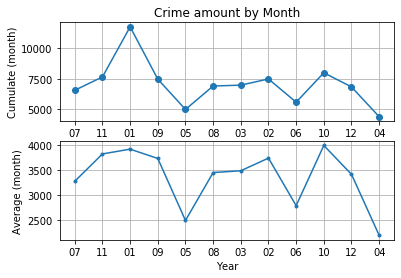

In [36]:
# Plot Visualisations

import matplotlib.pyplot as plt
import numpy as np

y = monthArray
t = monthTotalArray
a = monthAvgArray

plt.subplot(2, 1, 1)
plt.plot(y, t, 'o-')
plt.title('Crime amount by Month')
plt.ylabel('Cumulate (month)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(y, a, '.-')
plt.xlabel('Year')
plt.ylabel('Average (month)')
plt.grid(True)
plt.savefig("monthlyCrimeAmount.png")
plt.show()

In [37]:
# Create dataframe to retrieve information by year (total and average)

yearlyCrime = sqlContext.sql("select substring(Month, 0, 4) \
as Year, SUM(count) as Total, avg(count) as Average from \
tbl_britTransPolice2 group by substring(Month, 0, 4)")

In [38]:
yearlyCrime

DataFrame[Year: string, Total: bigint, Average: double]

In [39]:
yearlyCrime.show()

+----+-----+------------------+
|Year|Total|           Average|
+----+-----+------------------+
|2020|39323|3276.9166666666665|
|2022| 3951|            3951.0|
|2021|41269|3439.0833333333335|
+----+-----+------------------+



In [40]:
# Register the yearly data in a temp table and show the contents

yearlyCrime.registerTempTable("yearlyCrime")
sqlContext.sql("select * from yearlyCrime").show()

+----+-----+------------------+
|Year|Total|           Average|
+----+-----+------------------+
|2020|39323|3276.9166666666665|
|2022| 3951|            3951.0|
|2021|41269|3439.0833333333335|
+----+-----+------------------+



In [41]:
# Prepare variables for visualisations

totalArray = sqlContext.sql("select Total from yearlyCrime")\
.rdd.map(lambda f:f[0]).collect()
yearArray = sqlContext.sql("select Year from yearlyCrime")\
.rdd.map(lambda f:f[0]).collect()
averageArray = sqlContext.sql("select Average from yearlyCrime")\
.rdd.map(lambda f:f[0]).collect()

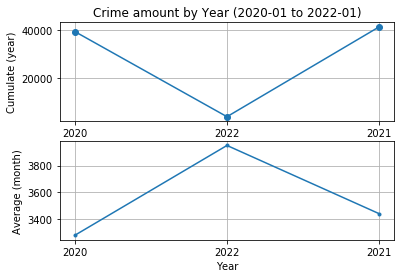

In [42]:
# Plot Visualisations

import matplotlib.pyplot as plt
import numpy as np

y = yearArray
t = totalArray
a = averageArray

plt.subplot(2, 1, 1)
plt.plot(y, t, 'o-')
plt.title('Crime amount by Year (2020-01 to 2022-01)')
plt.ylabel('Cumulate (year)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(y, a, '.-')
plt.xlabel('Year')
plt.ylabel('Average (month)')
plt.grid(True)
plt.savefig("yearlyCrimeAmount.png")
plt.show()

In [43]:
# Create a Temp Table

britTransPolice.registerTempTable("tbl_btpCrimeTypes")

In [44]:
# Explore Crime Types per year/month

btpCrimeTypes = sqlContext.sql("select Crime_type, Month, \
substring(Month, 0, 4) as Year,\
count(*) as Count from tbl_btpCrimeTypes group by Month, Crime_type")

In [45]:
#Display dataframe 'btpCrimeTypes'

btpCrimeTypes.show()

+--------------------+-------+----+-----+
|          Crime_type|  Month|Year|Count|
+--------------------+-------+----+-----+
|       Bicycle theft|2020-07|2020|  290|
|            Burglary|2020-06|2020|   14|
|Violence and sexu...|2021-01|2021|  417|
|             Robbery|2020-07|2020|   59|
|         Other crime|2020-12|2020|   16|
|Criminal damage a...|2020-03|2020|  326|
|            Burglary|2020-10|2020|   22|
|Possession of wea...|2021-08|2021|   58|
|            Burglary|2021-12|2021|   10|
|             Robbery|2021-05|2021|   57|
|Criminal damage a...|2021-03|2021|  439|
|       Bicycle theft|2020-12|2020|  146|
|       Bicycle theft|2021-11|2021|  465|
|               Drugs|2021-07|2021|  183|
|Violence and sexu...|2021-04|2021|  672|
|        Public order|2021-02|2021|  354|
|Violence and sexu...|2021-07|2021| 1021|
|             Robbery|2021-07|2021|   55|
|        Public order|2020-01|2020|  718|
|       Bicycle theft|2020-03|2020|  240|
+--------------------+-------+----

In [46]:
#PixieDust Python library for visualisation

import pixiedust

Pixiedust database opened successfully



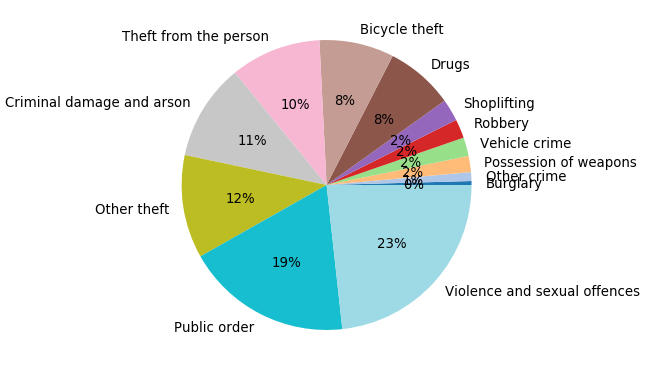

In [47]:
#Start Visualise dataframe 'btpCrimeTypes'

display(btpCrimeTypes)


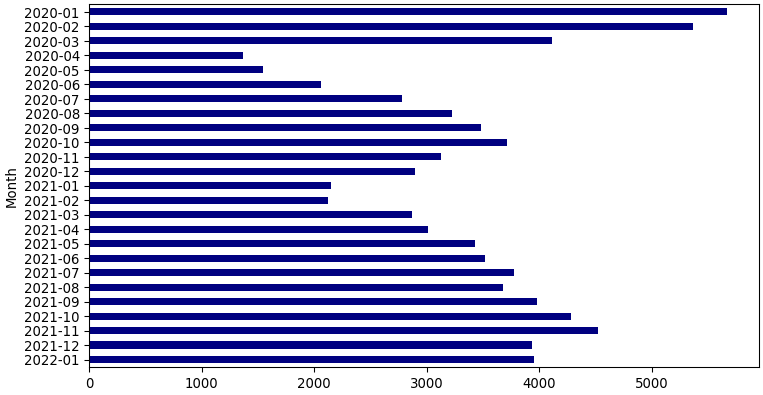

In [48]:
display(btpCrimeTypes)


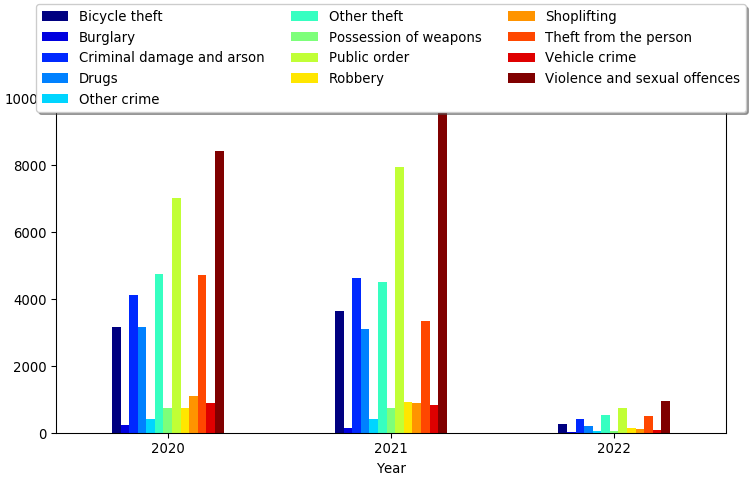

In [49]:
display(btpCrimeTypes)

In [50]:
display(britTransPolice)

In [51]:
display(britTransPolice)

In [52]:
display(britTransPolice)

In [53]:
display(britTransPolice)